In [2]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Movie-Ratings.csv')

In [4]:
df.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


# Rename Columns

In [5]:
df.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
df = df.rename(columns={'Film': 'film', 'Genre': 'genre', 'Rotten Tomatoes Ratings %': 'critic_rating', 'Audience Ratings %': 'audience_rating', 'Budget (million $)': 'budget', 'Year of release': 'year'})

In [7]:
df['genre'] = df.genre.astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
film               559 non-null object
genre              559 non-null category
critic_rating      559 non-null int64
audience_rating    559 non-null int64
budget             559 non-null int64
year               559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 22.8+ KB


# Jointplots

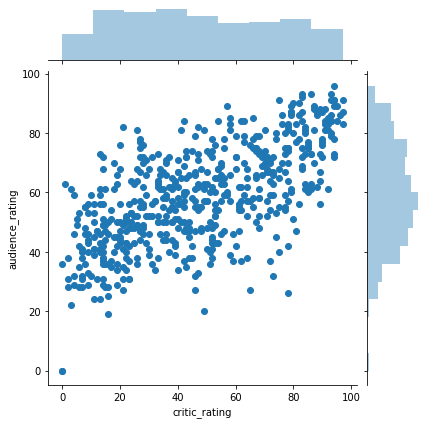

In [9]:
rcParams['figure.figsize'] = 12, 6
j = sns.jointplot(data=df, x='critic_rating', y='audience_rating')

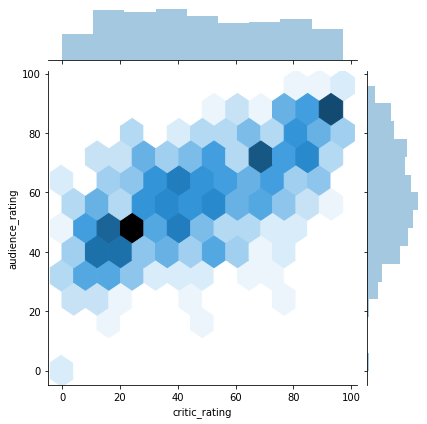

In [10]:
j = sns.jointplot(data=df, x='critic_rating', y='audience_rating', kind='hex')

# Histograms

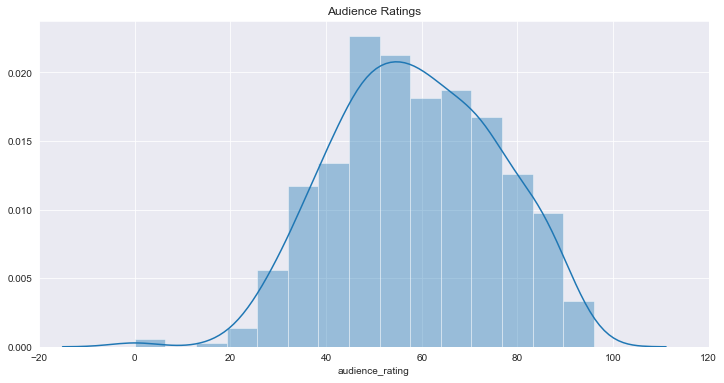

In [11]:
sns.set_style('darkgrid')
m1 = sns.distplot(df['audience_rating'], bins=15)
plt.xlim(-20, 120)
plt.title('Audience Ratings')
plt.show()

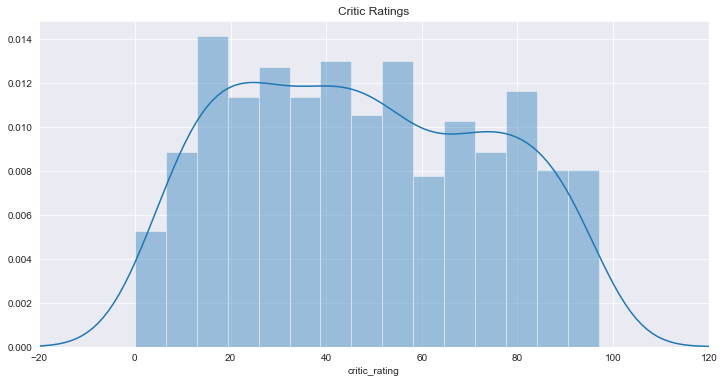

In [12]:
m2 = sns.distplot(df.critic_rating, bins=15)
plt.xlim(-20, 120)
plt.title('Critic Ratings')
plt.show()

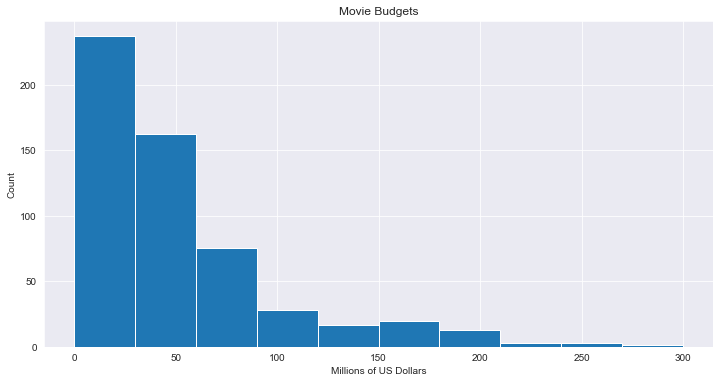

In [13]:
plt.hist(df.budget)

plt.title('Movie Budgets')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.show()

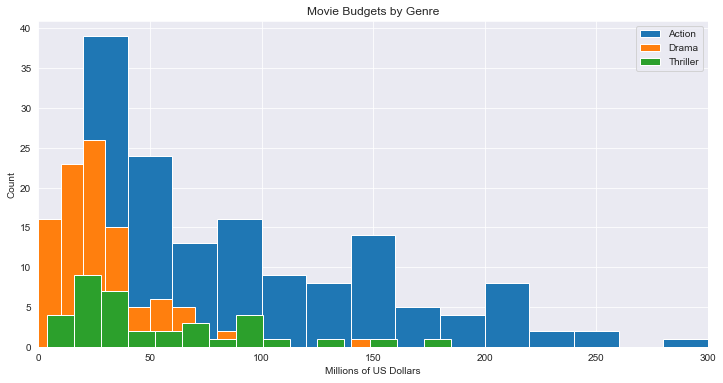

In [14]:
# subset genres

plt.hist(df[df['genre'] == 'Action'].budget, bins=15, label='Action')
plt.hist(df[df['genre'] == 'Drama'].budget, bins=15, label='Drama')
plt.hist(df[df['genre'] == 'Thriller'].budget, bins=15, label='Thriller')


plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

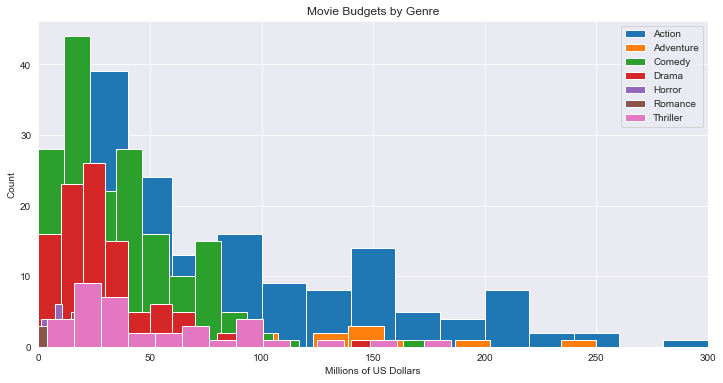

In [15]:
# loop through the genres

for gen in df.genre.cat.categories:
    plt.hist(df[df['genre'] == gen].budget, bins=15, label=gen)
    
plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

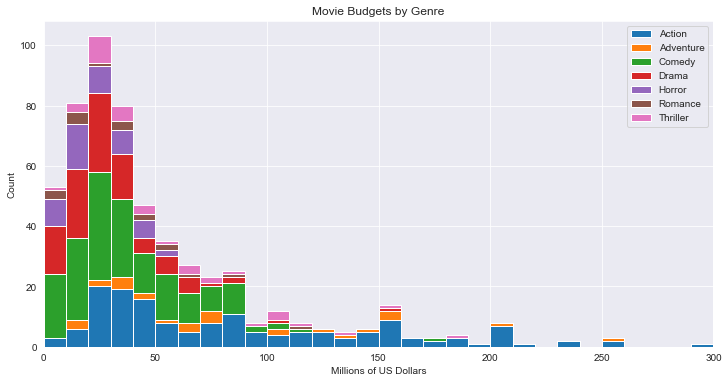

In [16]:
# loop through the genres, stacked histogram

list1 = list()
mylabels = list()
for gen in df.genre.cat.categories:
    list1.append(df[df['genre'] == gen].budget)
    mylabels.append(gen)

plt.hist(list1, bins=30, stacked=True, rwidth=1, label=mylabels)
plt.title('Movie Budgets by Genre')
plt.xlabel('Millions of US Dollars')
plt.ylabel('Count')
plt.xlim(0,300)
plt.legend()
plt.show()

# KDE Plot

- look at data distributions for critic and audience rating.

- bivariate distribution

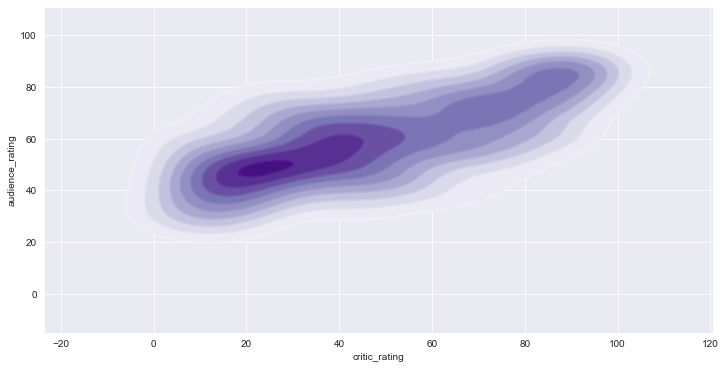

In [17]:
# layer the following code to create shading with crisp edges

k1 = sns.kdeplot(df.critic_rating, df.audience_rating, \
                 shade=True, shade_lowest=False, cmap='Purples')

k1b = sns.kdeplot(df.critic_rating, df.audience_rating, \
                 cmap='Purples')

# Violin and Box Plots

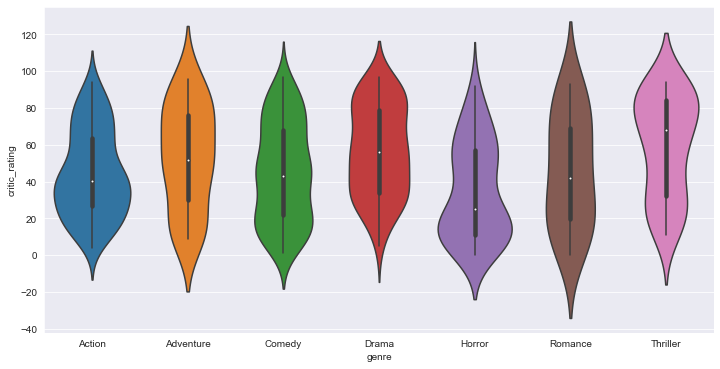

In [18]:
z = sns.violinplot(data=df, x='genre', y='critic_rating')

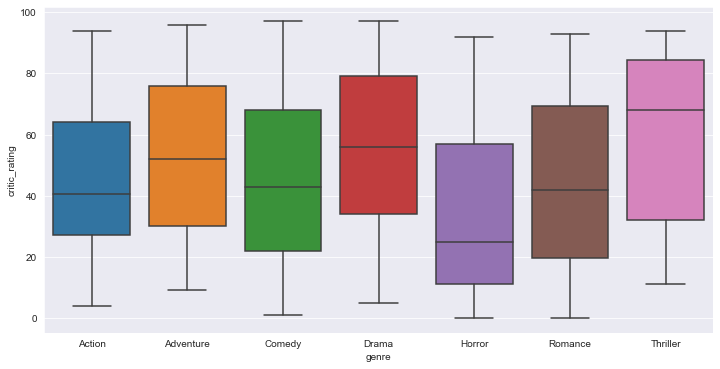

In [19]:
z1 = sns.boxplot(data=df, x='genre', y='critic_rating')

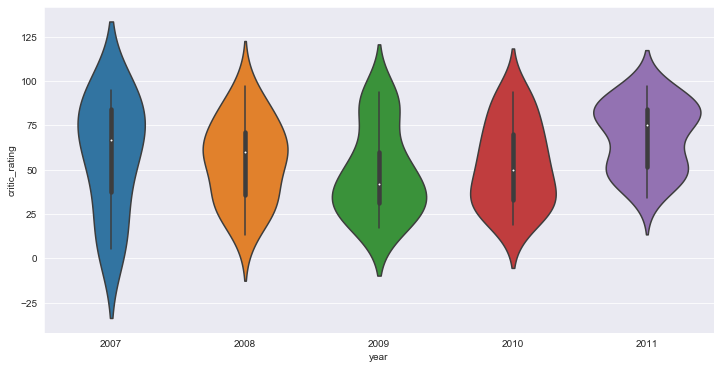

In [20]:
# subset for Drama movies only

w = sns.violinplot(data=df[df.genre == 'Drama'], x='year', y='critic_rating')

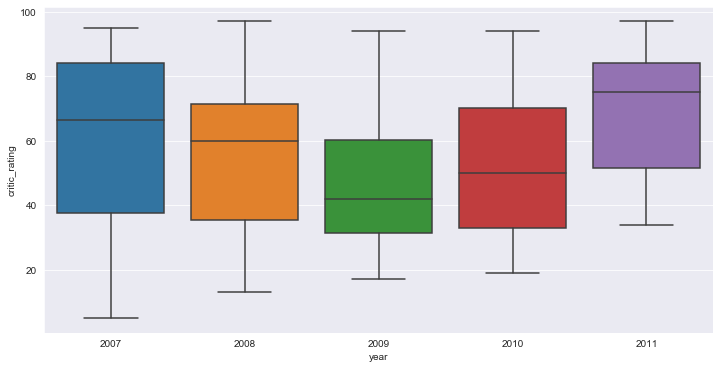

In [21]:
# subset for Drama movies only

w = sns.boxplot(data=df[df.genre == 'Drama'], x='year', y='critic_rating')

# Subplots

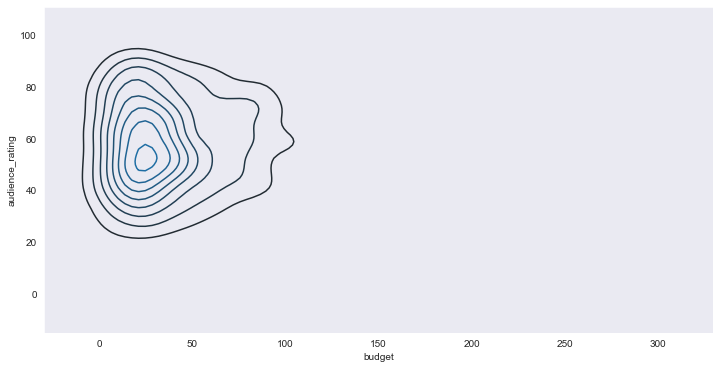

In [22]:
# Audience rating closer to a normal distribution

sns.set_style('dark')

k1 = sns.kdeplot(df.budget, df.audience_rating)

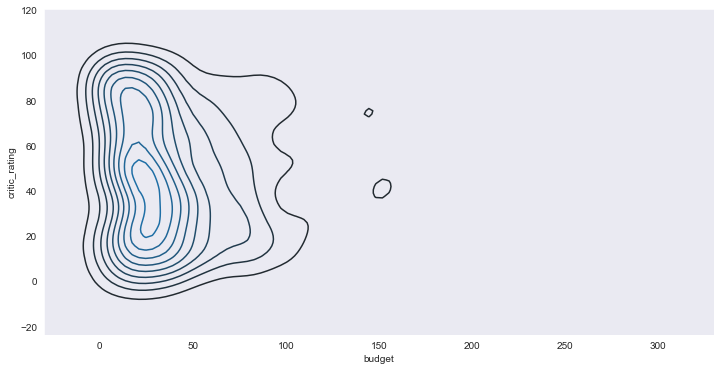

In [23]:
# critic rating closer to a uniform distribution

k2 = sns.kdeplot(df.budget, df.critic_rating)

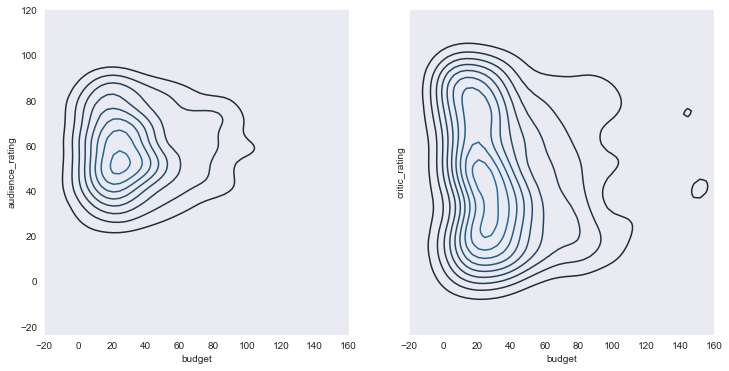

In [24]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)     # creates 1 row, 2 columns

k1 = sns.kdeplot(df.budget, df.audience_rating, ax=axes[0])
k2 = sns.kdeplot(df.budget, df.critic_rating, ax=axes[1])
k1.set(xlim=(-20, 160))           # only set x bc we have sharex above

plt.show()

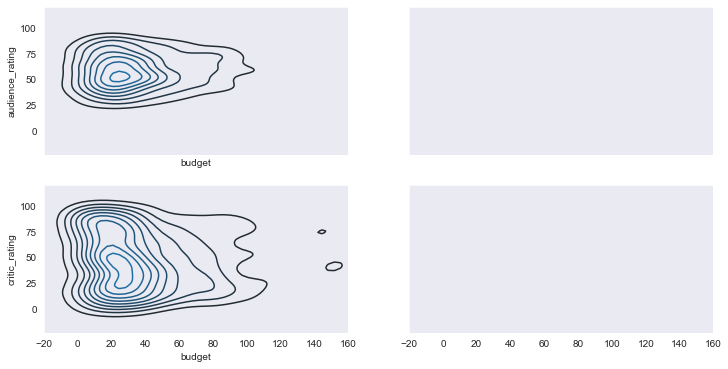

In [25]:
f, axes = plt.subplots(2, 2, figsize=(12,6), sharex=True, sharey=True)     # creates 1 row, 2 columns

k1 = sns.kdeplot(df.budget, df.audience_rating, ax=axes[0,0])
k2 = sns.kdeplot(df.budget, df.critic_rating, ax=axes[1,0])
k1.set(xlim=(-20, 160))           # only set x bc we have sharex above

plt.show()

# Facet Grid

- split up a visualization by some rule

- great way to observe trends!

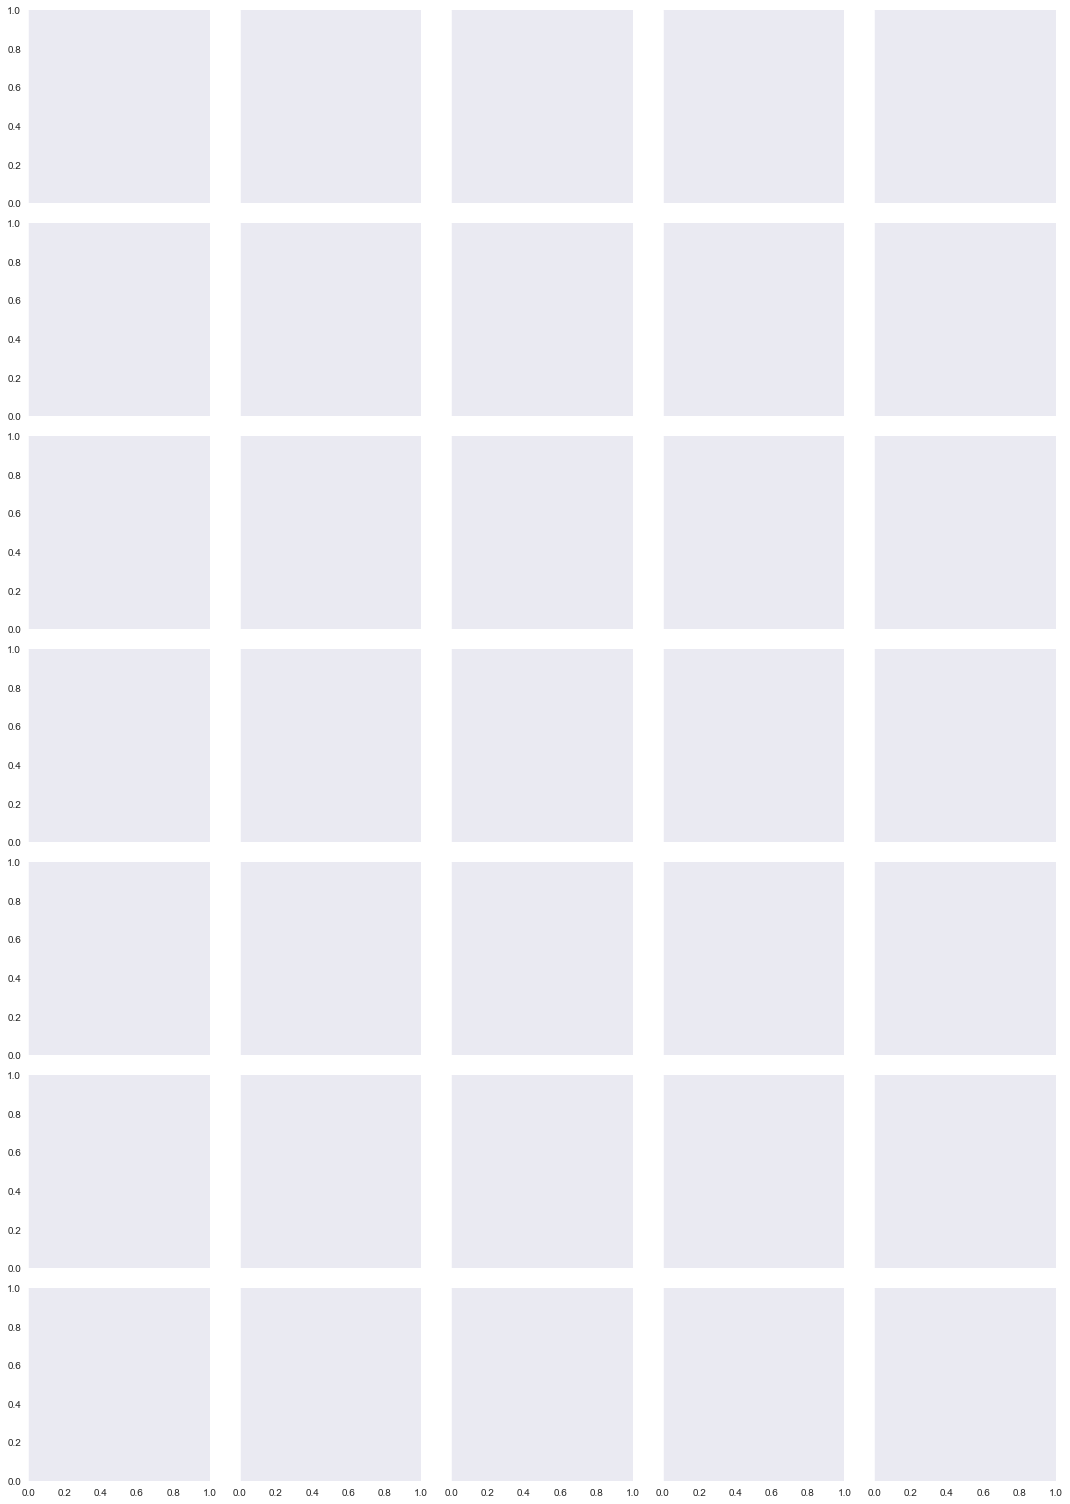

In [26]:
# create the facet grid itself

g = sns.FacetGrid(df, row='genre', col='year', hue='genre')

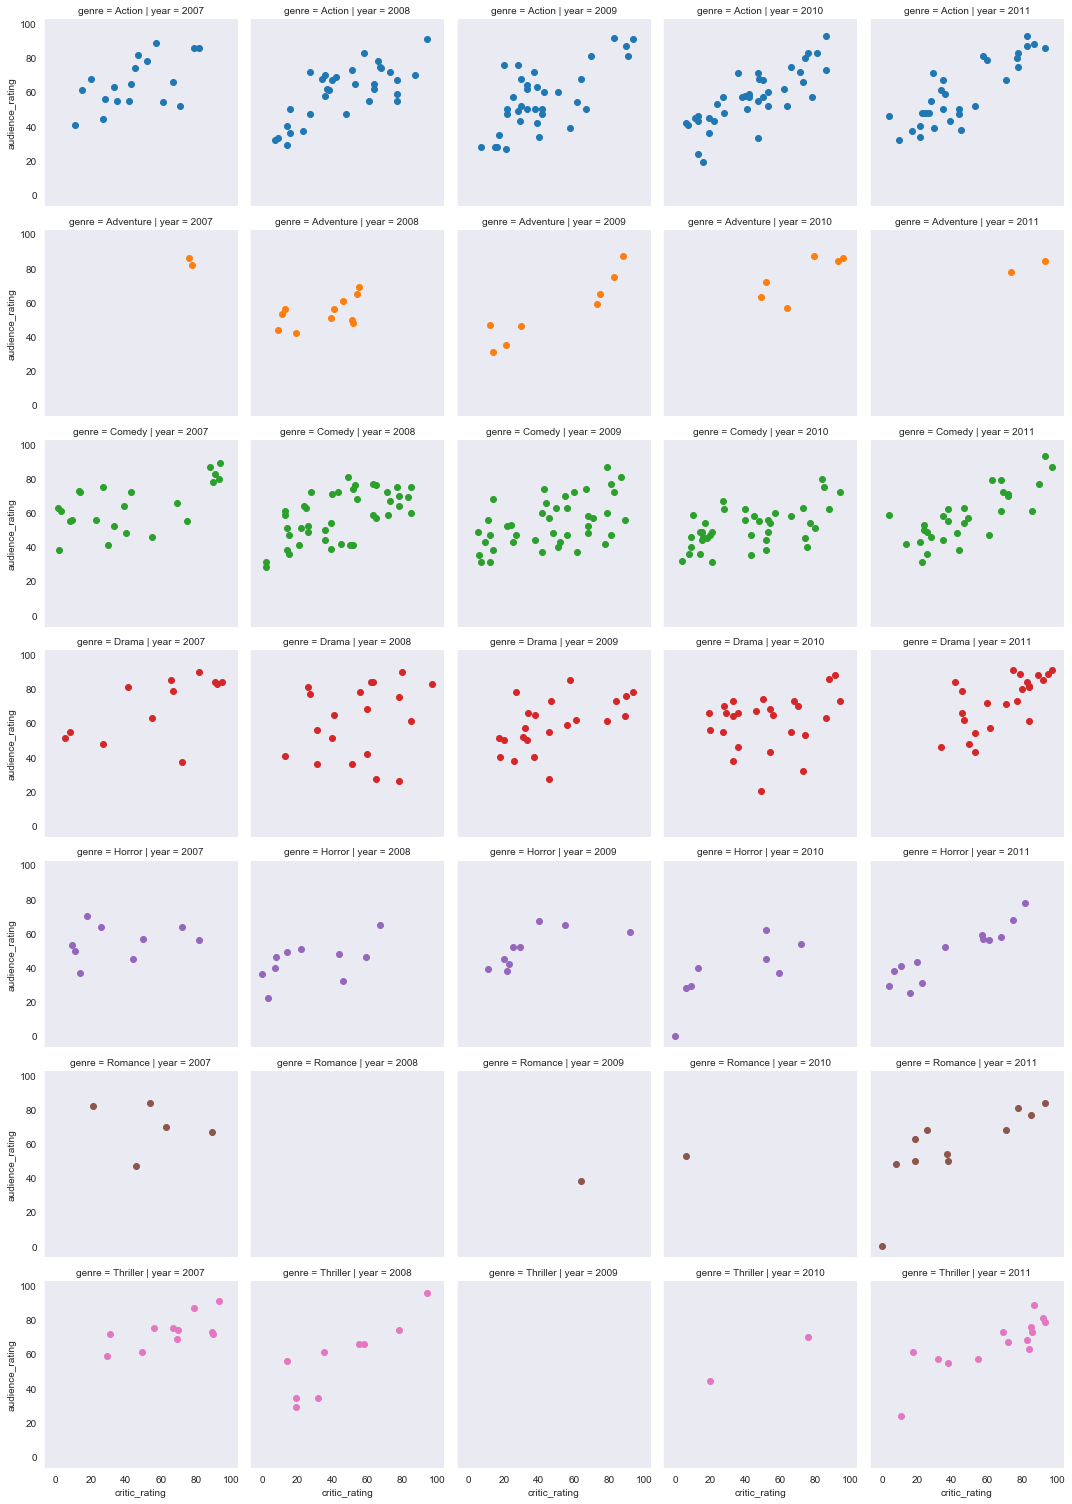

In [27]:
# populate facet grid
# pass a function, scatter, to map and arguments to build scatter plot

g = sns.FacetGrid(df, row='genre', col='year', hue='genre')
g = g.map(plt.scatter, 'critic_rating', 'audience_rating')

plt.show()

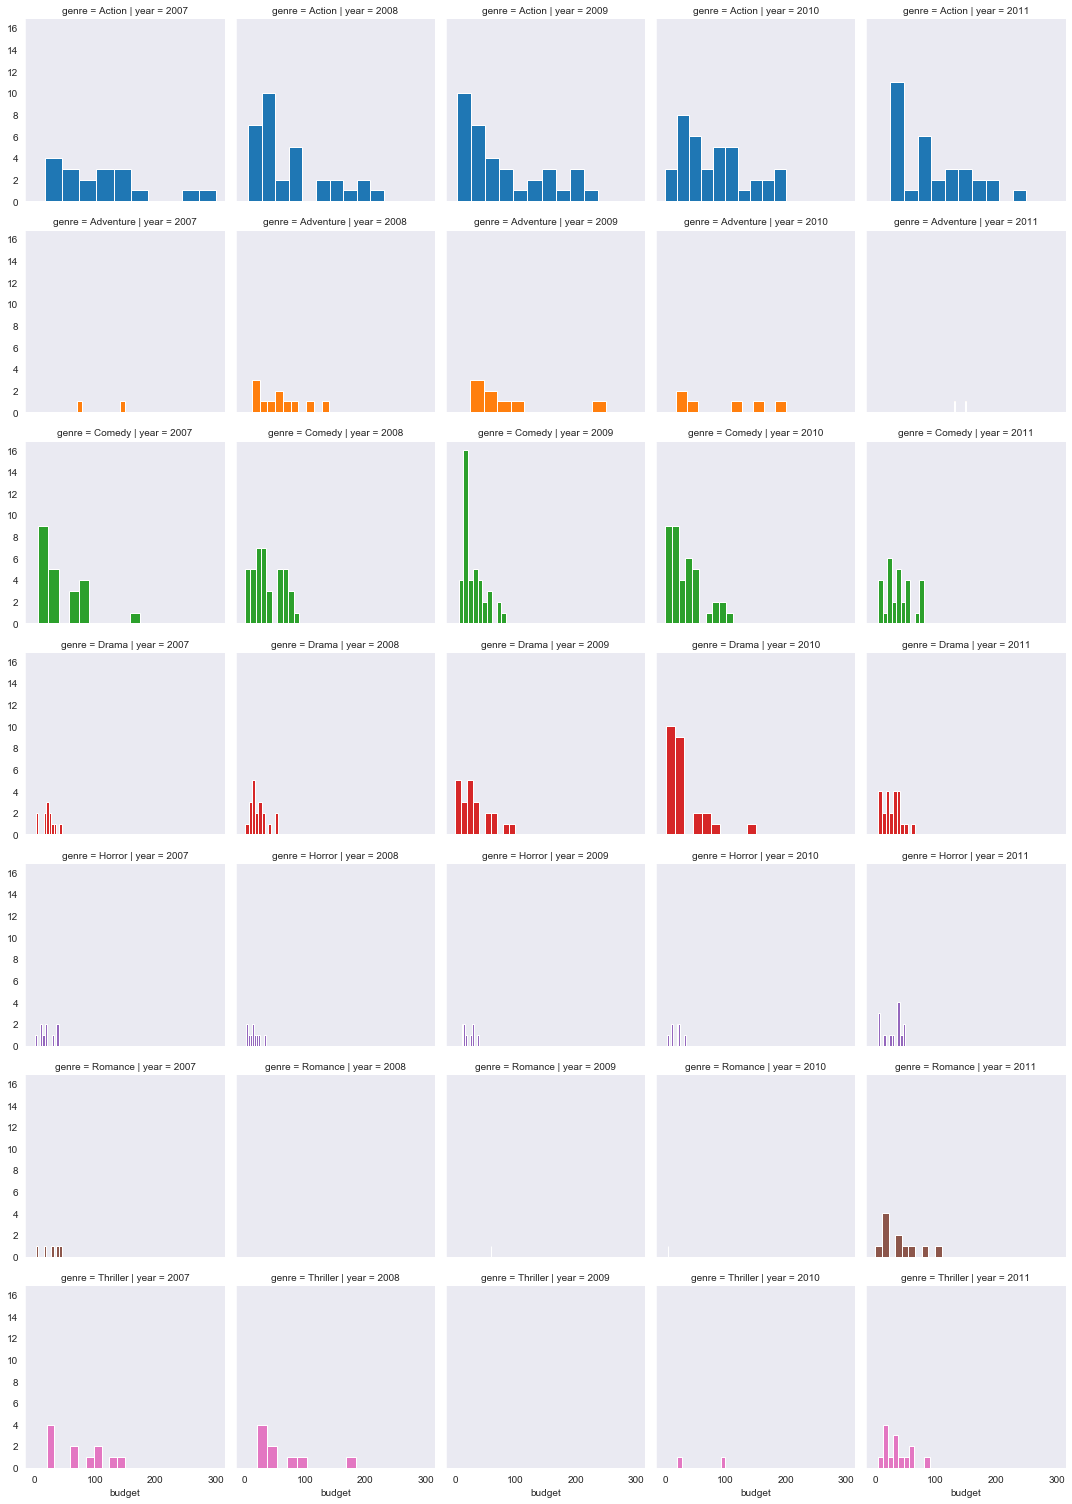

In [28]:
# populate with historgrams investigating budget by year by genre

g = sns.FacetGrid(df, row='genre', col='year', hue='genre')
g = g.map(plt.hist, 'budget')

plt.show()

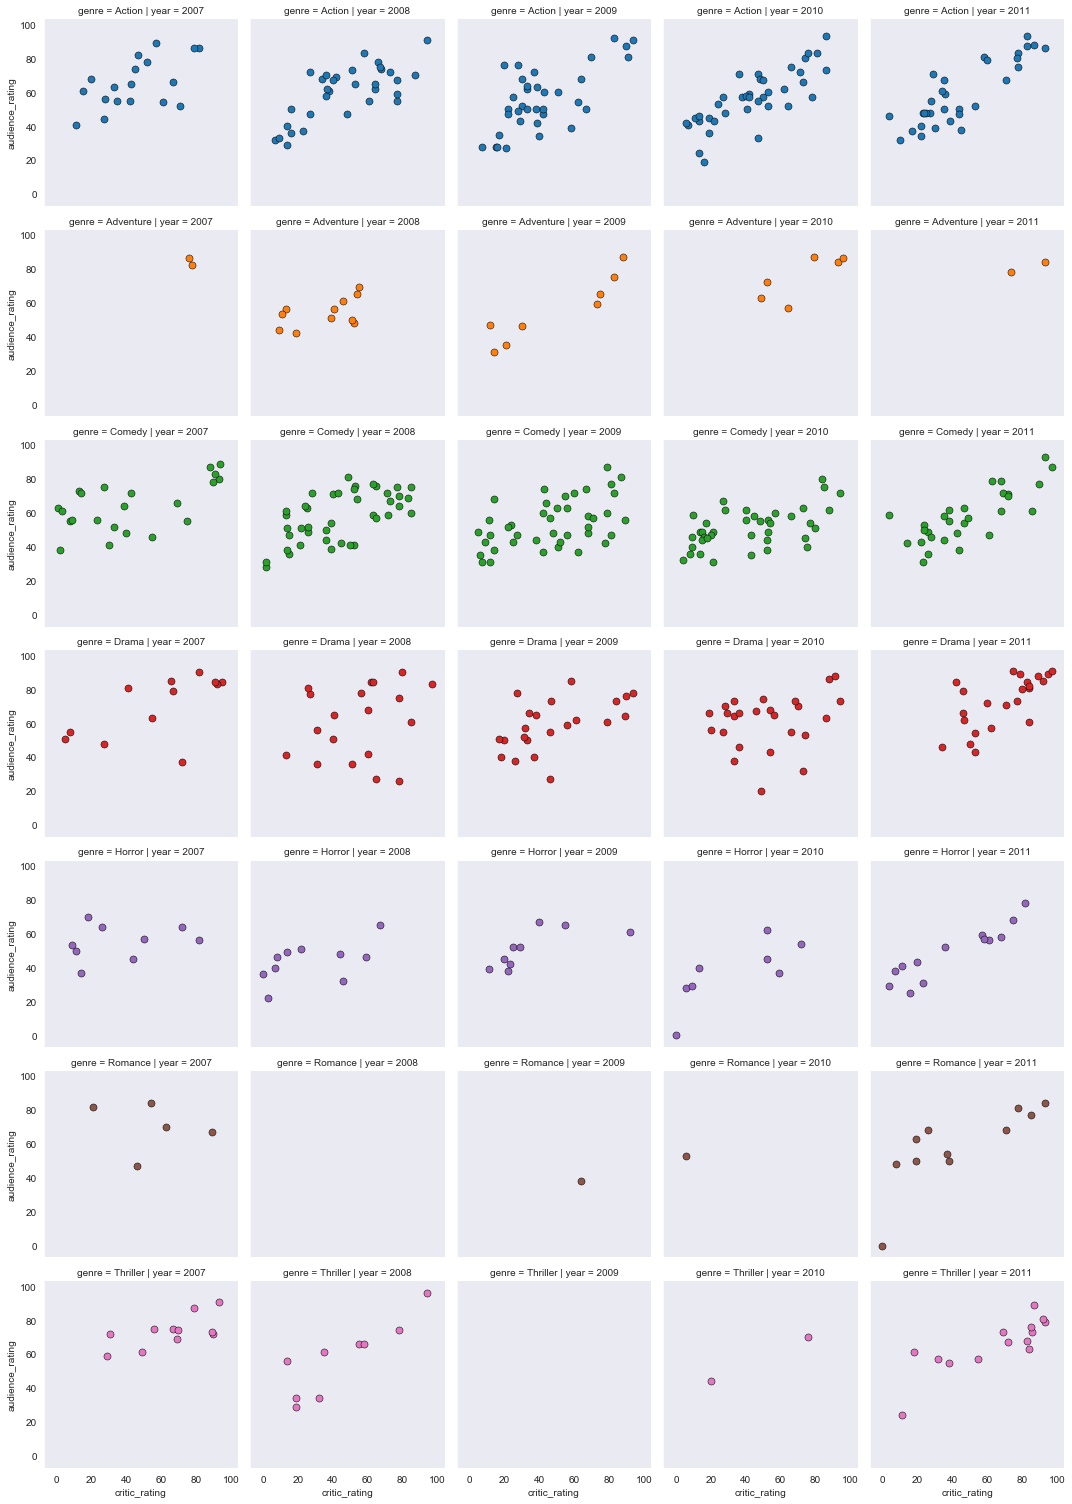

In [29]:
# pass a function, scatter, to map and arguments AND key word arguments in form of a dictionary

g = sns.FacetGrid(df, row='genre', col='year', hue='genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'critic_rating', 'audience_rating', **kws)

plt.show()

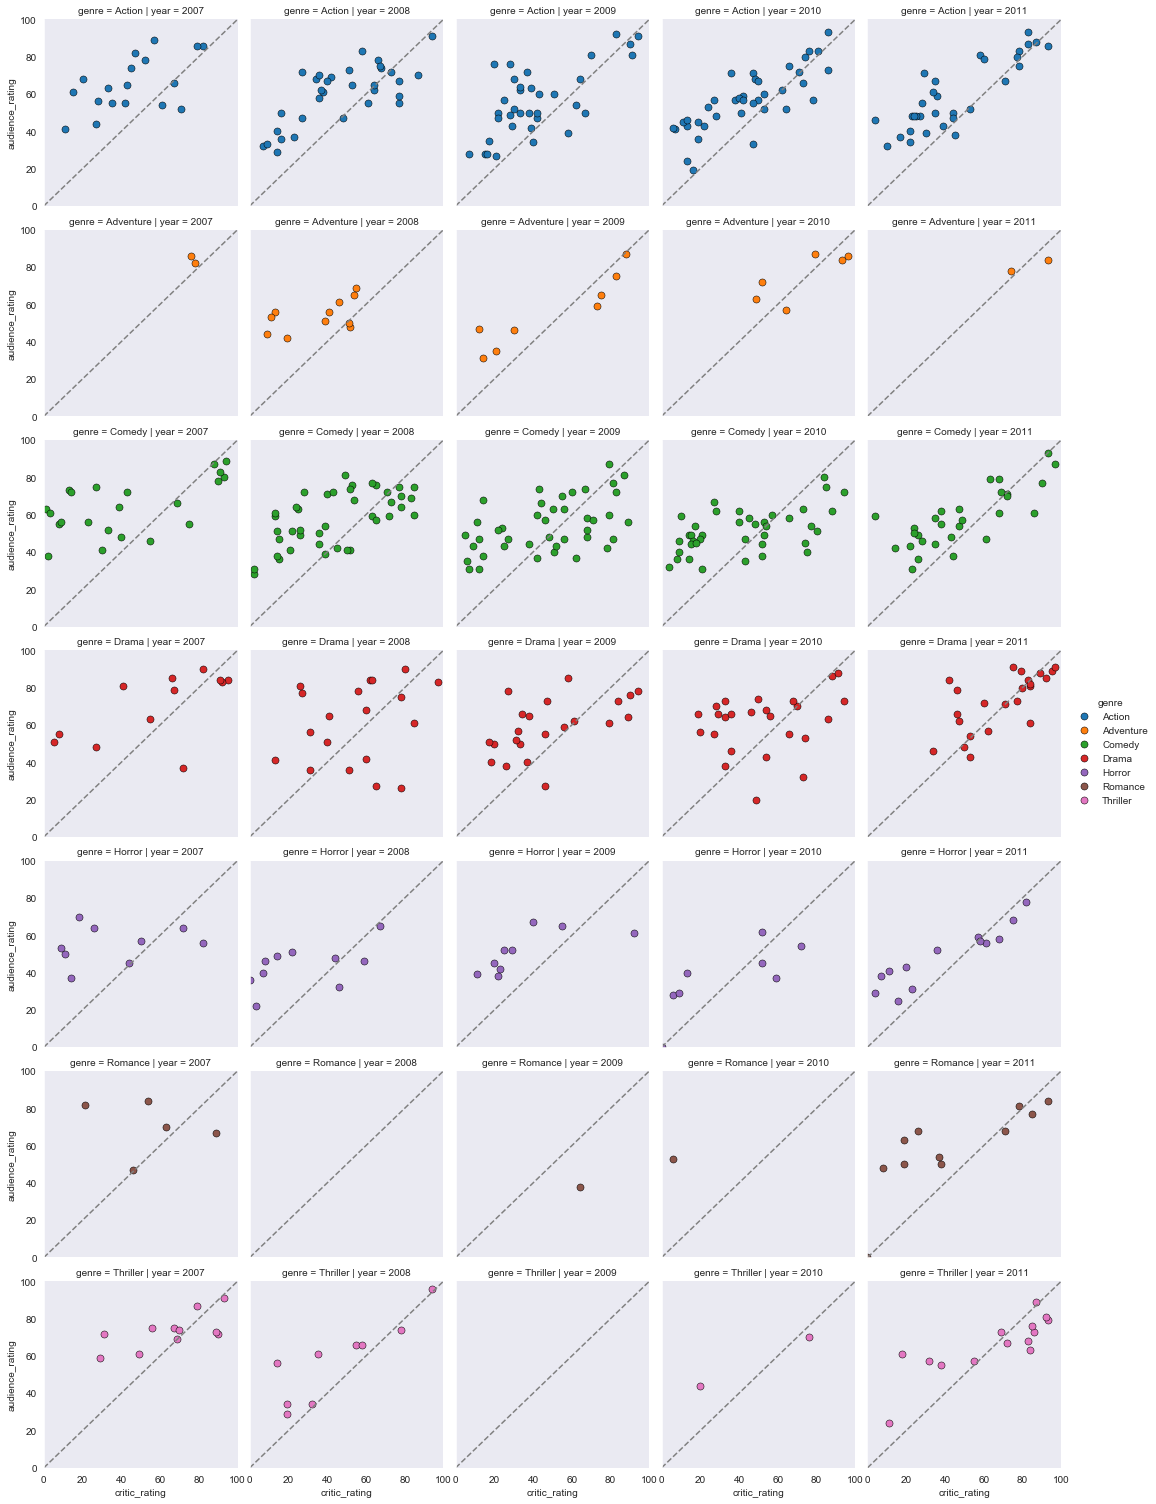

In [30]:
# controlling axes and adding diagonals to simplify interpretation
# if point falls above diagonal, audience gave better rating
# if point falls below diagonal, critic gave better rating

g = sns.FacetGrid(df, row='genre', col='year', hue='genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'critic_rating', 'audience_rating', **kws)
g.set(xlim=(0, 100), ylim=(0,100))

# create diagonal lines for easier reading
for ax in g.axes.flat:
    ax.plot((0, 100), (0,100), c='gray', ls='--')

g.add_legend()
plt.show()

## Altogether much harder to interpret

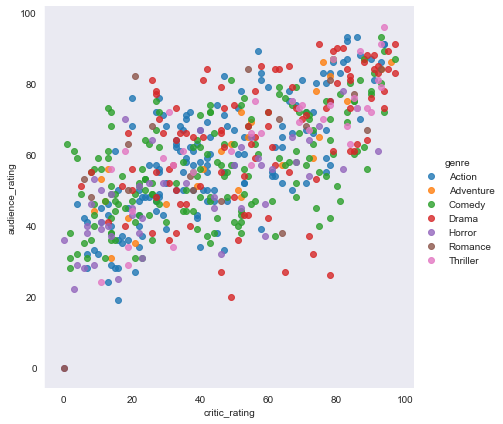

In [31]:
vis1 = sns.lmplot(data=df, x='critic_rating', y='audience_rating', \
                  fit_reg=False, hue='genre', \
                  size=6, aspect=1)

# Dashboards!

- dashboards are combinations of charts

- They are really subplots.

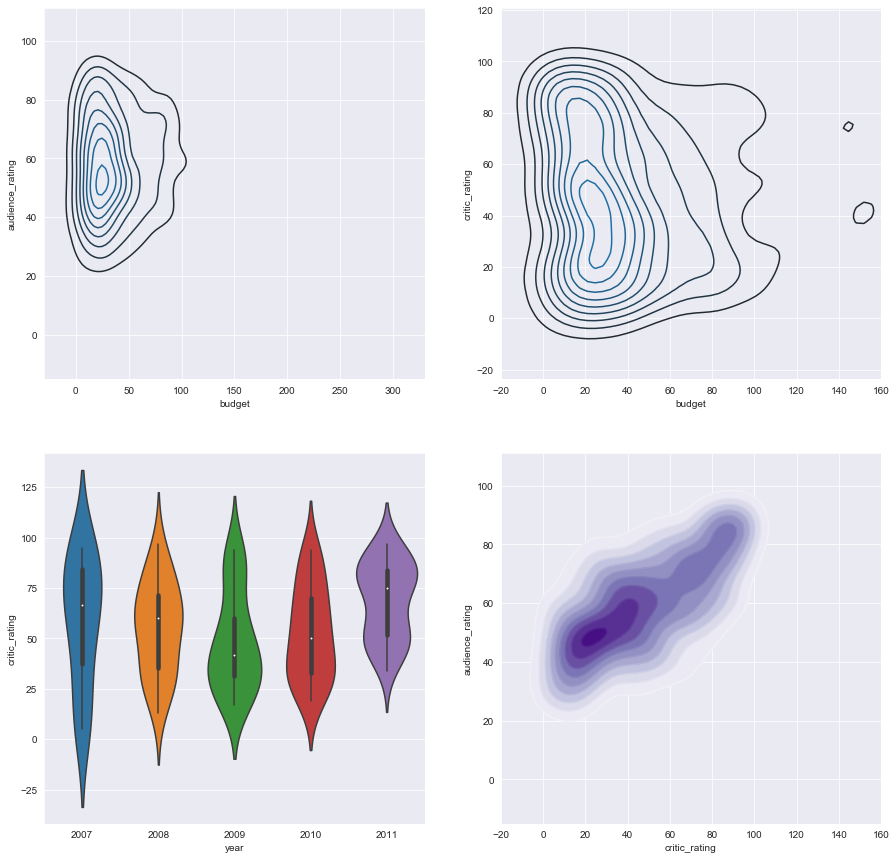

In [32]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))

k1 = sns.kdeplot(df.budget, df.audience_rating, ax=axes[0,0])
k2 = sns.kdeplot(df.budget, df.critic_rating, ax=axes[0,1])
w = sns.violinplot(data=df[df.genre == 'Drama'], x='year', y='critic_rating',\
                  ax=axes[1,0])

k1 = sns.kdeplot(df.critic_rating, df.audience_rating, \
                 shade=True, shade_lowest=False, cmap='Purples', \
                ax=axes[1,1])
k1b = sns.kdeplot(df.critic_rating, df.audience_rating, \
                 cmap='Purples', ax=axes[1,1])

# axes[1,1].hist(df.budget, bins=15)  # to add a non-sns chart, format like this

k1.set(xlim=(-20, 160))  
k2.set(xlim=(-20, 160))  


plt.show()